<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
print(df.shape)

(65437, 114)


In [9]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [8]:
print(df.dtypes)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [14]:
print(df.describe())

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [15]:
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
ResponseId              0.000000
MainBranch              0.000000
Age                     0.000000
Employment              0.000000
RemoteWork             16.246160
                         ...    
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
JobSat                 55.490013
Length: 114, dtype: float64


In [20]:
df_cleaned = df.dropna()
df_cleaned = df.dropna(axis=1)
df = df.fillna('Unknown')  
df = df.fillna(0)
print(df.isnull().sum())

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [22]:
print(df['Employment'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [23]:
print(df['JobSat'].value_counts())

JobSat
Unknown    36311
8.0         7509
7.0         6379
6.0         3751
9.0         3626
10.0        2251
5.0         1956
3.0         1165
4.0         1130
2.0          772
0.0          311
1.0          276
Name: count, dtype: int64


In [24]:
print(df['YearsCodePro'].value_counts())

YearsCodePro
Unknown               13827
2                      4168
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
40                      194
32                      194
34     

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


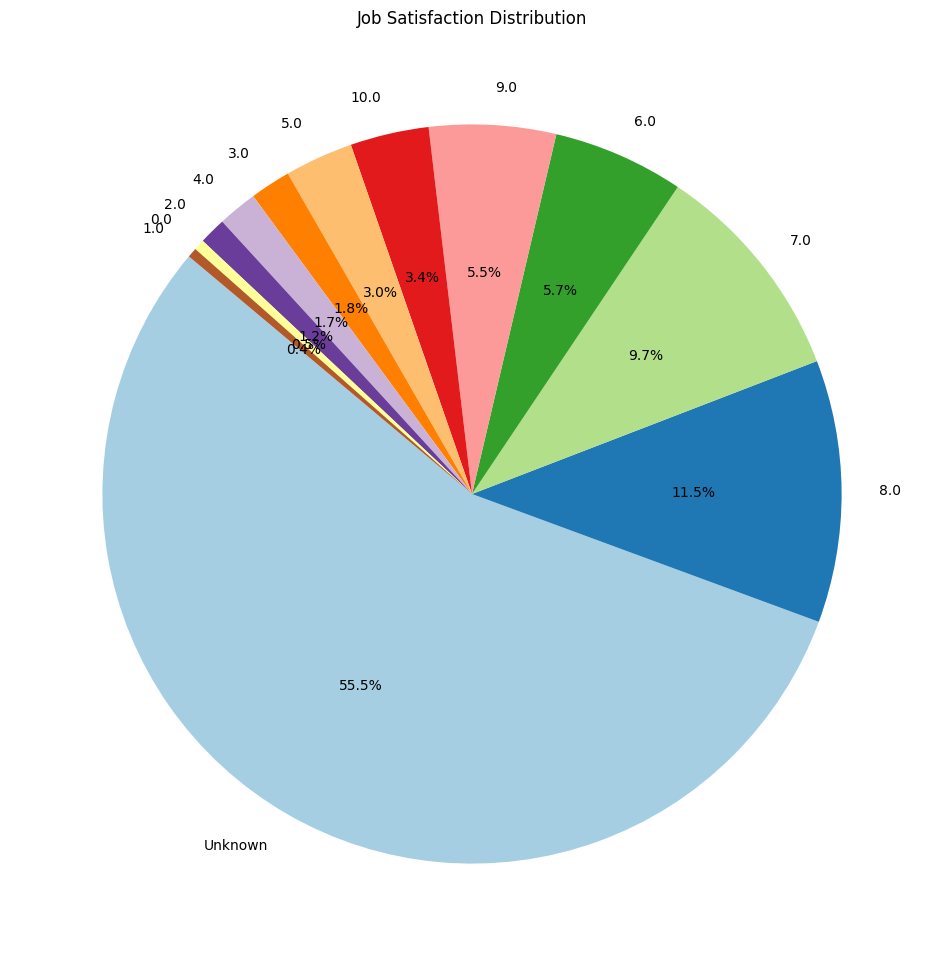

In [32]:
job_sat_counts = df['JobSat'].value_counts()

plt.figure(figsize=(12, 12))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Job Satisfaction Distribution')
plt.ylabel('') 
plt.show()

Interpretation
The "Unknown" category accounts for 55.5% of the data, indicating that a significant portion of respondents did not provide a clear job satisfaction level.
The satisfaction level 8.0, representing 11.5% of respondents. This suggests that many developers have high job satisfaction.
Satisfaction level 7.0 follows closely at 9.7%, further reinforcing a trend of positive job satisfaction among developers.
Lower satisfaction levels, such as 1.0 (very dissatisfied), account for less than 1%, showing that dissatisfaction is rare among respondents.
Satisfaction levels between 2.0 and 5.0 also have smaller proportions (ranging between 1.7% and 5.5%).

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [36]:
## Write your code here
worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

worked_with_counts = worked_with.value_counts()
want_to_work_with_counts = want_to_work_with.value_counts()

print("Top languages developers have worked with:")
print(worked_with_counts.head())

print("\nTop languages developers want to work with:")
print(want_to_work_with_counts.head())


Top languages developers have worked with:
LanguageHaveWorkedWith
JavaScript    37492
HTML/CSS      31816
Python        30719
SQL           30682
TypeScript    23150
Name: count, dtype: int64

Top languages developers want to work with:
LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64


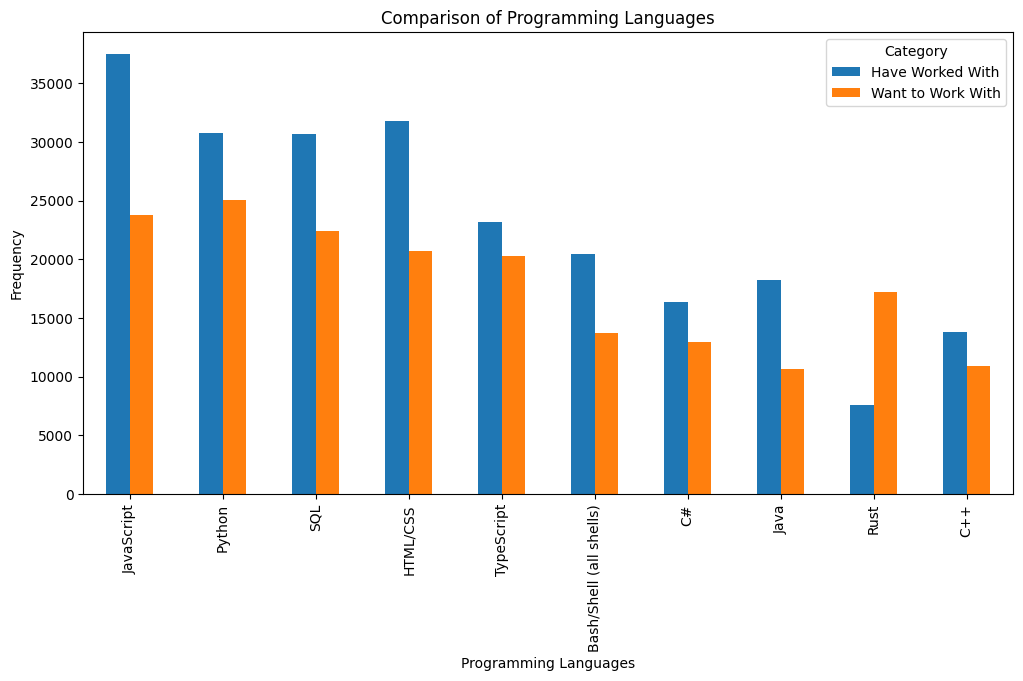

In [39]:
combined_counts = pd.DataFrame({
    'Have Worked With': worked_with_counts,
    'Want to Work With': want_to_work_with_counts
}).fillna(0)

top_languages = combined_counts.sum(axis=1).sort_values(ascending=False).head(10)
combined_counts = combined_counts.loc[top_languages.index]

combined_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Programming Languages")
plt.ylabel("Frequency")
plt.xlabel("Programming Languages")
plt.legend(title="Category")
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by Country using a grouped bar chart or heatmap.


In [42]:
remote_work_trends = df.groupby(['Country', 'RemoteWork']).size().unstack()
print(remote_work_trends)

RemoteWork                            Hybrid (some remote, some in-person)  \
Country                                                                      
Afghanistan                                                           17.0   
Albania                                                               14.0   
Algeria                                                               19.0   
Andorra                                                                1.0   
Angola                                                                 4.0   
...                                                                    ...   
Venezuela, Bolivarian Republic of...                                  10.0   
Viet Nam                                                              62.0   
Yemen                                                                  3.0   
Zambia                                                                 4.0   
Zimbabwe                                                        

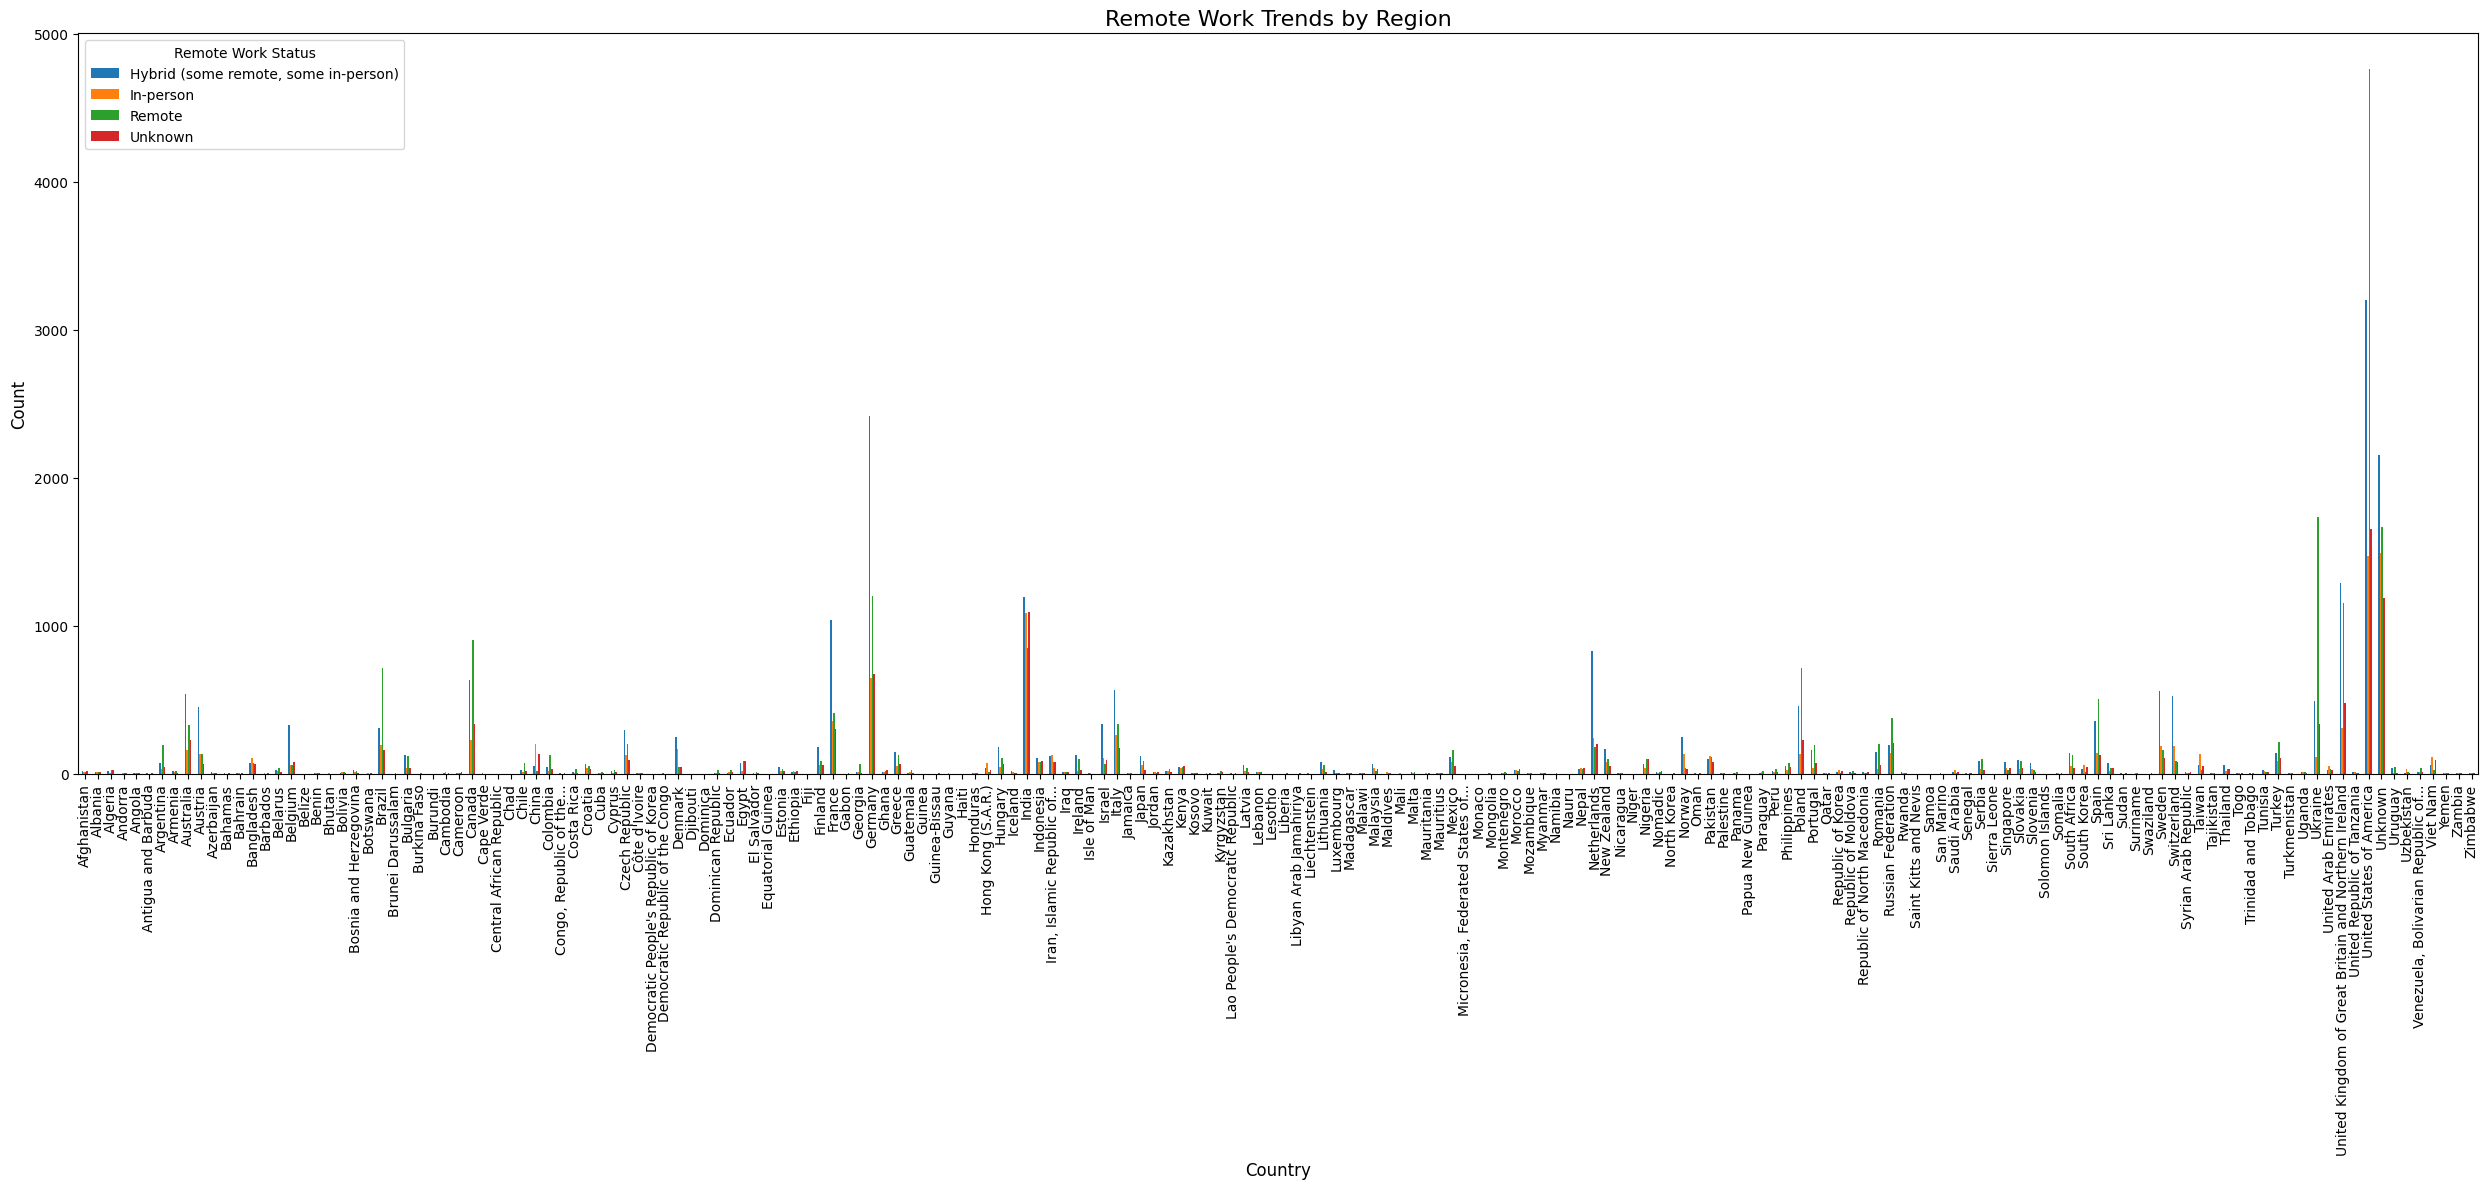

In [46]:
remote_work_trends.plot(kind='bar', figsize=(25, 12), stacked=False)
plt.title("Remote Work Trends by Region", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.legend(title="Remote Work Status", fontsize=10)
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [47]:
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df_cleaned = df.dropna(subset=['JobSat', 'YearsCodePro'])

In [50]:
pearson_corr = df_cleaned['JobSat'].corr(df_cleaned['YearsCodePro'], method='pearson')
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")

Pearson Correlation Coefficient: 0.10


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [52]:
employment_edu_ct = pd.crosstab(df['Employment'], df['EdLevel'])
print(employment_edu_ct)

EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                                                                   12   

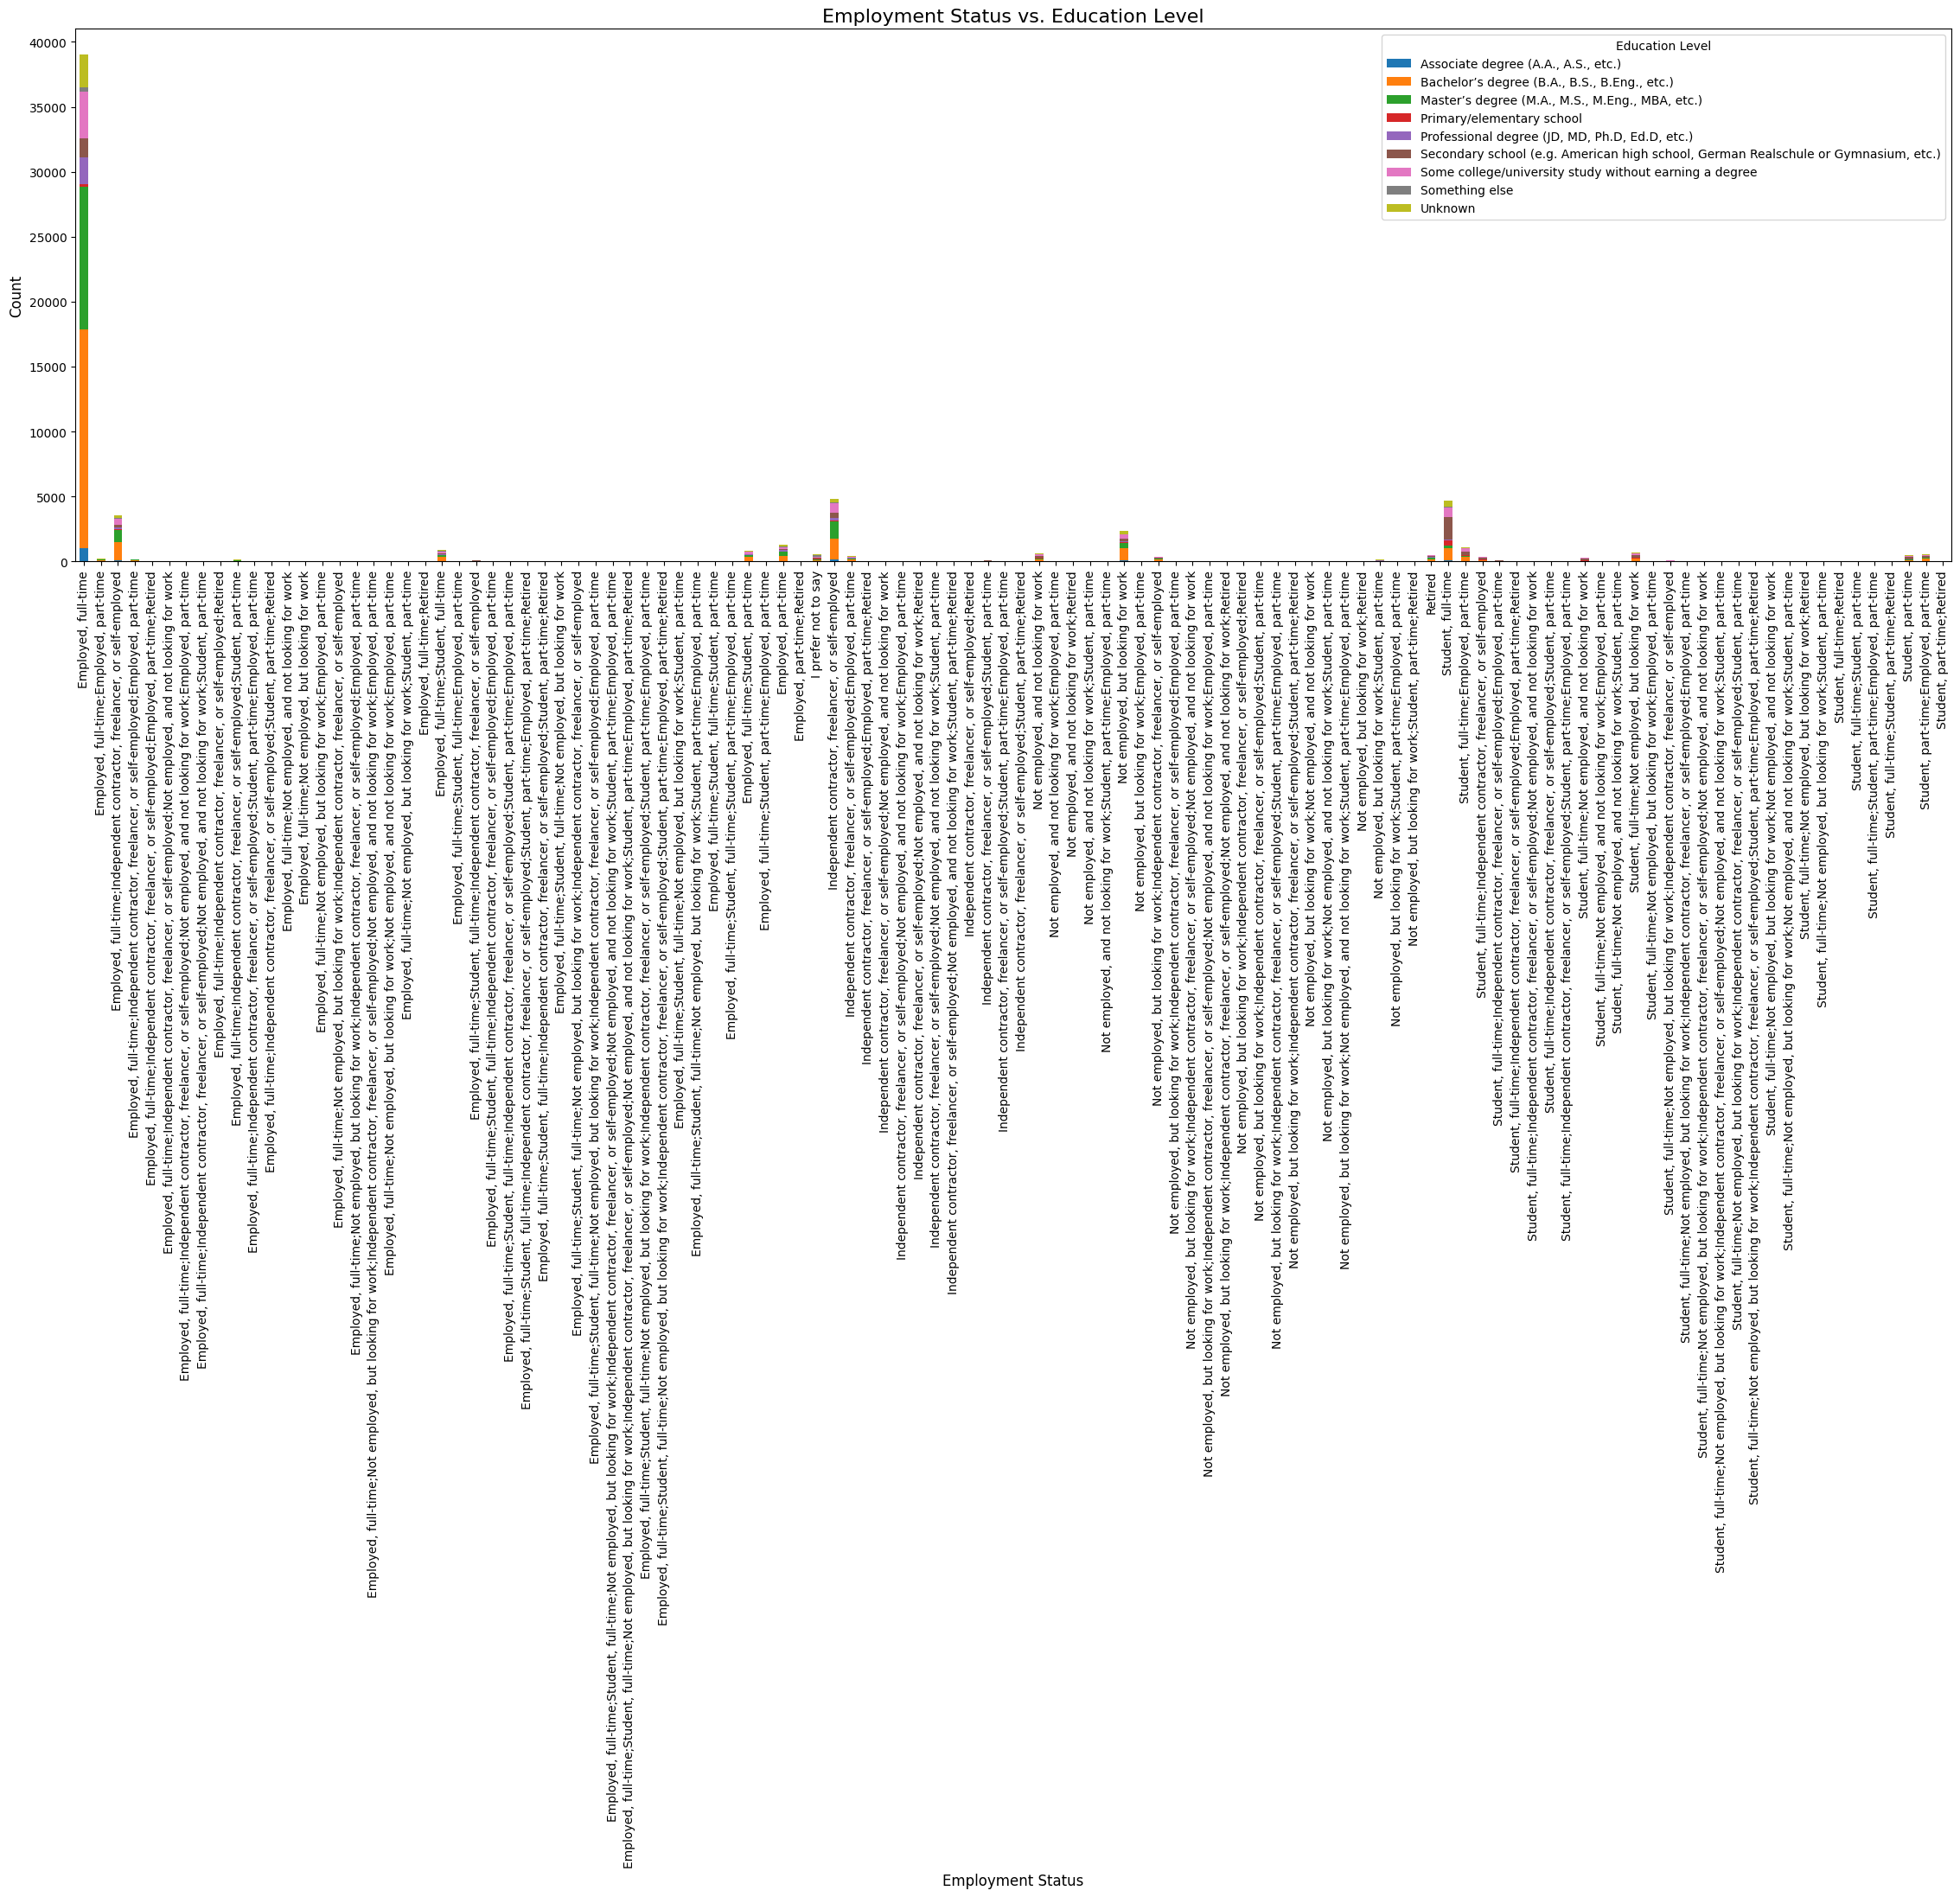

In [59]:
employment_edu_ct.plot(kind='bar', stacked=True, figsize=(28, 8))
plt.title('Employment Status vs. Education Level', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Education Level', fontsize=10)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
